# open img

Image shape: (640, 640, 3)


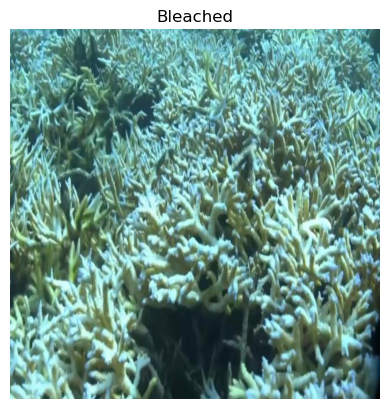

In [22]:
# View an image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

# View a random image from the training dataset
img = view_random_image(
  target_dir=r"Coral Reef Images/test/",
  target_class="Bleached"
)

In [23]:
img

array([[[100, 174, 177],
        [ 93, 166, 173],
        [103, 173, 185],
        ...,
        [ 38,  82,  81],
        [ 39,  81,  80],
        [ 38,  80,  79]],

       [[ 96, 170, 173],
        [ 94, 167, 173],
        [106, 176, 186],
        ...,
        [ 38,  82,  81],
        [ 39,  81,  80],
        [ 38,  80,  79]],

       [[ 89, 163, 164],
        [ 92, 163, 167],
        [102, 172, 182],
        ...,
        [ 40,  82,  81],
        [ 39,  81,  80],
        [ 38,  80,  79]],

       ...,

       [[174, 246, 243],
        [179, 251, 247],
        [184, 254, 246],
        ...,
        [  6,   2,   0],
        [  7,   2,   0],
        [  6,   1,   0]],

       [[172, 246, 245],
        [177, 252, 248],
        [182, 253, 247],
        ...,
        [  7,   2,   0],
        [  7,   2,   0],
        [  8,   0,   0]],

       [[173, 249, 249],
        [177, 251, 250],
        [180, 252, 248],
        ...,
        [  7,   2,   0],
        [  9,   1,   0],
        [  8,   0,   0]]

In [24]:
img.shape

(640, 640, 3)

In [25]:
img/255

array([[[0.39215686, 0.68235294, 0.69411765],
        [0.36470588, 0.65098039, 0.67843137],
        [0.40392157, 0.67843137, 0.7254902 ],
        ...,
        [0.14901961, 0.32156863, 0.31764706],
        [0.15294118, 0.31764706, 0.31372549],
        [0.14901961, 0.31372549, 0.30980392]],

       [[0.37647059, 0.66666667, 0.67843137],
        [0.36862745, 0.65490196, 0.67843137],
        [0.41568627, 0.69019608, 0.72941176],
        ...,
        [0.14901961, 0.32156863, 0.31764706],
        [0.15294118, 0.31764706, 0.31372549],
        [0.14901961, 0.31372549, 0.30980392]],

       [[0.34901961, 0.63921569, 0.64313725],
        [0.36078431, 0.63921569, 0.65490196],
        [0.4       , 0.6745098 , 0.71372549],
        ...,
        [0.15686275, 0.32156863, 0.31764706],
        [0.15294118, 0.31764706, 0.31372549],
        [0.14901961, 0.31372549, 0.30980392]],

       ...,

       [[0.68235294, 0.96470588, 0.95294118],
        [0.70196078, 0.98431373, 0.96862745],
        [0.72156863, 0

In [26]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk(r"Coral Reef Images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'Coral Reef Images'.
There are 2 directories and 0 images in 'Coral Reef Images\test'.
There are 0 directories and 135 images in 'Coral Reef Images\test\Bleached'.
There are 0 directories and 122 images in 'Coral Reef Images\test\Healthy'.
There are 2 directories and 0 images in 'Coral Reef Images\train'.
There are 0 directories and 1365 images in 'Coral Reef Images\train\Bleached'.
There are 0 directories and 1378 images in 'Coral Reef Images\train\Healthy'.
There are 2 directories and 0 images in 'Coral Reef Images\valid'.
There are 0 directories and 240 images in 'Coral Reef Images\valid\Bleached'.
There are 0 directories and 223 images in 'Coral Reef Images\valid\Healthy'.


In [27]:
import os


def trim_dataset(folder_path, keep_count=1500, dry_run=False):
    """
    Keeps the first 'keep_count' images in a folder and deletes the rest.
    
    Args:
        folder_path (str): Path to the folder containing images.
        keep_count (int): Number of images to keep (default 1500).
        dry_run (bool): If True, only prints what will be deleted. 
                        If False, actually deletes the files.
    """
    
    # 1. Check if folder exists
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        return

    # 2. Get list of image files only
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
    all_files = os.listdir(folder_path)
    
    # Filter for images and sort them to ensure deterministic selection
    image_files = sorted([f for f in all_files if f.lower().endswith(valid_extensions)])
    
    total_images = len(image_files)
    print(f"Total images found: {total_images}")
    
    if total_images <= keep_count:
        print(f"Folder has fewer than {keep_count} images. No action needed.")
        return

    # 3. Identify files to delete
    # This selects everything starting from index 1500 to the end
    files_to_delete = image_files[keep_count:]
    
    print(f"Preparing to delete {len(files_to_delete)} images...")

    # 4. Delete the files
    for img_name in files_to_delete:
        file_path = os.path.join(folder_path, img_name)
        
        if dry_run:
            # Just print, don't delete
            print(f"[DRY RUN] Would delete: {img_name}")
        else:
            # Actually delete
            try:
                os.remove(file_path)
            except Exception as e:
                print(f"Error deleting {img_name}: {e}")

    if dry_run:
        print("\n--- DRY RUN COMPLETE ---")
        print(f"To actually delete these files, run the function again with dry_run=False")
    else:
        print(f"\nSuccess! Deleted {len(files_to_delete)} images. {keep_count} remain.")

# ==========================================
# USAGE
# ==========================================

# Define your path (using the raw string 'r' method we fixed earlier)
my_folder = r'Coral Reef Images\train\Healthy'

# Step 1: Run in SAFE MODE (Dry Run) first to check
trim_dataset(my_folder, keep_count=1378, dry_run=False)

# Step 2: Uncomment the line below ONLY when you are ready to delete
# trim_dataset(my_folder, keep_count=1500, dry_run=False)

Total images found: 1378
Folder has fewer than 1378 images. No action needed.


In [28]:
for dirpath, dirnames, filenames in os.walk("Coral Reef Images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'Coral Reef Images'.
There are 2 directories and 0 images in 'Coral Reef Images\test'.
There are 0 directories and 135 images in 'Coral Reef Images\test\Bleached'.
There are 0 directories and 122 images in 'Coral Reef Images\test\Healthy'.
There are 2 directories and 0 images in 'Coral Reef Images\train'.
There are 0 directories and 1365 images in 'Coral Reef Images\train\Bleached'.
There are 0 directories and 1378 images in 'Coral Reef Images\train\Healthy'.
There are 2 directories and 0 images in 'Coral Reef Images\valid'.
There are 0 directories and 240 images in 'Coral Reef Images\valid\Bleached'.
There are 0 directories and 223 images in 'Coral Reef Images\valid\Healthy'.


# the model

## imports

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import pandas as pd

In [6]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = r'Coral Reef Images/train/'
test_dir = r'Coral Reef Images/test/'

In [31]:
# Set the seed
tf.random.set_seed(42)

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 2743 images belonging to 2 classes.
Found 257 images belonging to 2 classes.


c:\Users\Acer-Swift\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Acer-Swift\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 64s 691ms/step - accuracy: 0.8925 - loss: 0.2347 - val_accuracy: 0.7899 - val_loss: 0.7920
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 56s 650ms/step - accuracy: 0.9799 - loss: 0.0586 - val_accuracy: 0.7743 - val_loss: 0.9122
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 57s 656ms/step - accuracy: 0.9971 - loss: 0.0126 - val_accuracy: 0.7588 - val_loss: 1.7582
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 61s 706ms/step - accuracy: 0.9851 - loss: 0.0428 - val_accuracy: 0.7549 - val_loss: 1.5083
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 56s 646ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.7665 - val_loss: 1.7527


In [32]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

<Axes: >

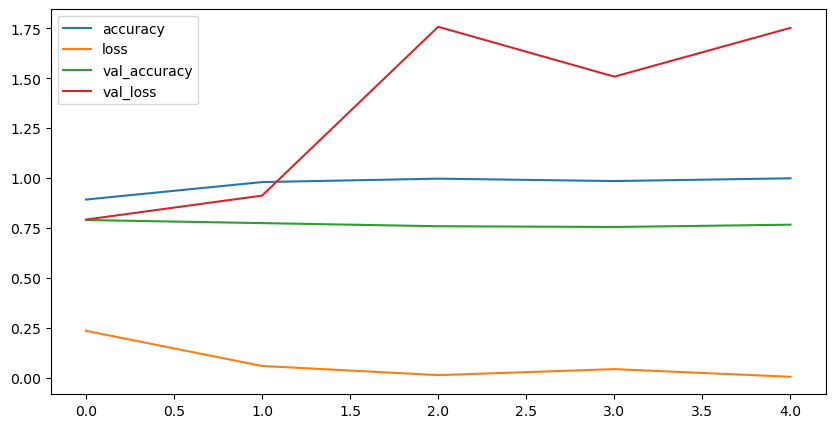

In [33]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 5))

## 2nd model

In [34]:

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 2743 images belonging to 2 classes.
Found 257 images belonging to 2 classes.


In [35]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

c:\Users\Acer-Swift\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [37]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

c:\Users\Acer-Swift\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 49s 538ms/step - accuracy: 0.8673 - loss: 0.2968 - val_accuracy: 0.7471 - val_loss: 0.9412
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 516ms/step - accuracy: 0.9672 - loss: 0.0955 - val_accuracy: 0.7588 - val_loss: 0.7936
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 486ms/step - accuracy: 0.9825 - loss: 0.0516 - val_accuracy: 0.7626 - val_loss: 0.9806
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 492ms/step - accuracy: 0.9865 - loss: 0.0393 - val_accuracy: 0.7082 - val_loss: 1.8624
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 46s 530ms/step - accuracy: 0.9934 - loss: 0.0191 - val_accuracy: 0.7626 - val_loss: 1.3410


In [38]:
# Check out the model architecture
model_5.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

<Axes: >

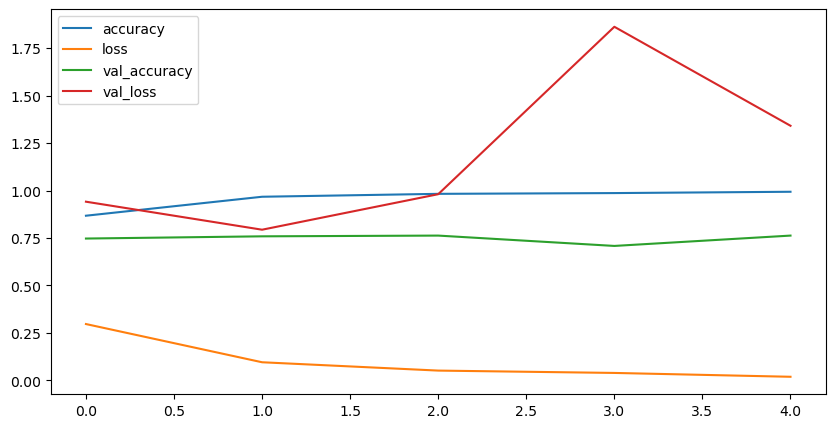

In [39]:
# Plot loss curves of model_5 results
pd.DataFrame(history_5.history).plot(figsize=(10, 5))

In [7]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [8]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 2743 images belonging to 2 classes.
Non-augmented training images:
Found 2743 images belonging to 2 classes.
Unchanged test images:
Found 257 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = next(iter(train_data))
augmented_images, augmented_labels = next(iter(train_data_augmented)) # Note: labels aren't augmented, they stay the same

AttributeError: 'DirectoryIterator' object has no attribute 'next'

In [1]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

NameError: name 'train_datagen_augmented' is not defined

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

c:\Users\Acer-Swift\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'train_data_augmented' is not defined